In [1]:
#f_df2,n_df2,m_df2
%pylab inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,classification_report
from sklearn.cross_validation import train_test_split 
from sklearn.learning_curve import learning_curve
from sklearn.metrics import roc_curve, auc
from statsmodels.tools import categorical

import pandas as pd

from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
def reject_outliers2(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
def load_data():
    df=pd.read_csv("de/all_data_bias_labour_gender_all_persons.csv",sep="\t",index_col=0)
    df2=df[["labor_market_woman","Bias"]]
    df2=df2.dropna()
    df2.drop(["Apothekerin","Botin","Bundeskanzlerin","Diakonin","Direktrice","Politesse","Hostess","Magd",
         "Mannequin","Nonne","Ordensschwester","Taxifahrerin"],inplace=True)
    print len(df),len(df2)
    df2["Bias2"]=df2.Bias.apply(lambda x: 0 if x=="male" else 1 if x=="neutral" else 2 )


    dff_m=reject_outliers2(df2[df2.Bias=="male"].labor_market_woman.values)
    dff_f=reject_outliers2(df2[df2.Bias=="female"].labor_market_woman.values)
    dff_n=reject_outliers2(df2[df2.Bias=="neutral"].labor_market_woman.values)
    df_df = pd.DataFrame({'labor_market_woman':np.append(dff_m,values=np.append(dff_f,dff_n)),
                          'Bias':["male"]*len(dff_m)+["female"]*len(dff_f)+["neutral"]*len(dff_n)})
    df_df["Bias2"]=df_df.Bias.apply(lambda x: 0 if x=="male" else 1 if x=="neutral" else 2 )
    return df_df

885 859
Coefficients: 
[[ 0.35929166]]
[-35.06498587]
0.396168582375
             precision    recall  f1-score   support

       male       1.00      1.00      1.00       783
     female       1.00      0.40      0.57         5

avg / total       1.00      1.00      1.00       788



C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


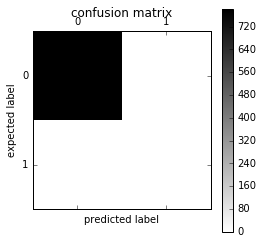

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       783
          2       1.00      0.40      0.57         5

avg / total       1.00      1.00      1.00       788

[[783   0]
 [  3   2]]
Standard errors:  [ 12.62071766   0.1355715 ]
Wald statistics:  [ 7.71932337  7.02356282]
p_val coef 0.00804440094715
p_val intercep 0.00546328683816
1.86826801619
1.0980891375
t = 2.65020052509
p_val: 0.00804440094715
CI:
0.0935715214828 0.625011807135


In [49]:
df_df=load_data()
df_df=df_df[(df_df["Bias2"]==0)|(df_df["Bias2"]==2)]

y=df_df['Bias2'].values.reshape((len(df_df),1))
X=df_df["labor_market_woman"].values.reshape((len(df_df),1))

X_train=X[:,:]
Y_train=y[:,:]


logistic = LogisticRegression(C=1e5)#multi_class='multinomial', solver='lbfgs')
res=logistic.fit(X_train,Y_train)
y_true=Y_train
y_pred=res.predict(X_train)
# The coefficients
print'Coefficients: \n', res.coef_
print res.intercept_
print r2_score(y_true, y_pred)



#target_names = ['male', 'neutral', 'female']#
target_names = ['male',  'female']
print(classification_report(y_true, y_pred, target_names=target_names))


plt.matshow(confusion_matrix(y_true, y_pred), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

print classification_report(y_true, y_pred)
print confusion_matrix(y_true, y_pred)

ci_p_val_z_score_scikit(res,X_train)

885 859
Coefficients: 
[[ 0.9594727]]
[-80.97869261]
1.0
             precision    recall  f1-score   support

    neutral       1.00      1.00      1.00        52
     female       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        57



C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


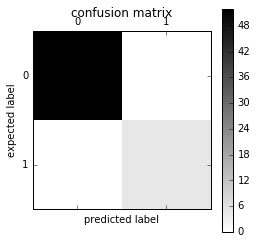

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        52
          2       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        57

[[52  0]
 [ 0  5]]


In [4]:
df_df=load_data()

df_df=df_df[(df_df["Bias2"]==1)|(df_df["Bias2"]==2)]
y=df_df['Bias2'].values.reshape((len(df_df),1))
X=df_df["labor_market_woman"].values.reshape((len(df_df),1))

X_train=X[:,:]
Y_train=y[:,:]


logistic = LogisticRegression(C=1e5)#multi_class='multinomial', solver='lbfgs')
res=logistic.fit(X_train,Y_train)
y_true=Y_train
y_pred=res.predict(X_train)
# The coefficients
print'Coefficients: \n', res.coef_
print res.intercept_
print r2_score(y_true, y_pred)



#target_names = ['male', 'neutral', 'female']#
target_names = ['neutral',  'female']
print(classification_report(y_true, y_pred, target_names=target_names))


plt.matshow(confusion_matrix(y_true, y_pred), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

print classification_report(y_true, y_pred)
print confusion_matrix(y_true, y_pred)

2 [0, 1]


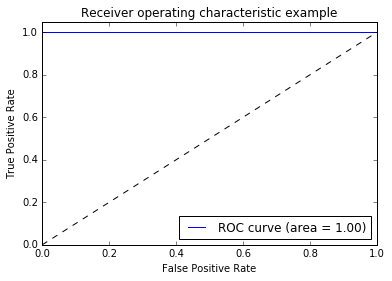

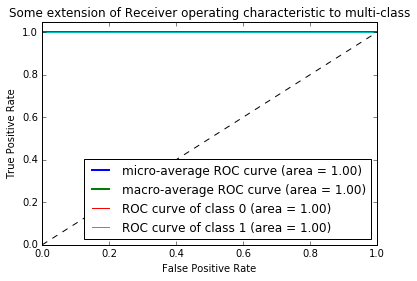

In [190]:
y_score=res.predict_proba(X_train)
y_true2,dict_labels=categorical(y_true[:,0],dictnames=True, drop=True)

# Compute ROC curve and ROC area for each class
n_classes = y_true2.shape[1]
print n_classes,range(n_classes)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(y_true2[:,i], y_score[:,i])#1-> 0 #male
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true2.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
plt.plot(fpr[1], tpr[1], label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [3]:


def predict_model(predict_case,remove=False,train_split=True):
    
    df_df=load_data()
    if remove=="neutral":
        df_df=df_df[(df_df["Bias2"]==0)|(df_df["Bias2"]==2)]
    elif remove=="male":
        df_df=df_df[(df_df["Bias2"]==1)|(df_df["Bias2"]==2)]
    df_df["Bias2"]=df_df.Bias.apply(lambda x: 1 if x==predict_case else 0 )
    
    data = df_df[["labor_market_woman","Bias2"]]
    data=sm.add_constant(data, prepend=False)
    train_cols = data.columns[0]
    y=data['Bias2']
    X=data[train_cols]
    X=sm.add_constant(X, prepend=False)
    X=X.rename(columns = {'const':'intercept'})

    #res1 = sm.MNLogit(y, X) 
    if train_split==True:
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
        print len(X_train), len(X_test), len(X_train) + len(X_test)
    else:
        X_train,Y_train=X,y
    res1=sm.Logit(Y_train, X_train) 
    mlogit_res = res1.fit()
    print mlogit_res.params
    print mlogit_res.summary()
    print mlogit_res.pred_table()
    acc=float(sum(mlogit_res.pred_table().diagonal()))/float(len(Y_train))
    print "Accuracy:",acc
    print "Odds:\n", np.exp(mlogit_res.params)
    print "p:\n", np.exp(mlogit_res.params)/(1+np.exp(mlogit_res.params))

    return mlogit_res


# male and female without neutral case
#predict female

In [200]:
fem_male_pred=predict_model(predict_case="female",remove="neutral")

885 859
630 158 788
Optimization terminated successfully.
         Current function value: 0.018701
         Iterations 14
labor_market_woman     0.354521
intercept            -34.553061
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                  Bias2   No. Observations:                  630
Model:                          Logit   Df Residuals:                      628
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:                  0.5960
Time:                        01:20:17   Log-Likelihood:                -11.781
converged:                       True   LL-Null:                       -29.162
                                        LLR p-value:                 3.730e-09
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------

In [201]:
print "probability of being in female bias group given 2% of woman in labor market:"
print 1.0/(1+np.exp(-(fem_male_pred.params[1]+fem_male_pred.params[0]*2)))

print "probability of being in female bias group given 20% of woman in labor market:"
print 1.0/(1+np.exp(-(fem_male_pred.params[1]+fem_male_pred.params[0]*20)))

print "probability of being in female bias group given 90% of woman in labor market:"
print 1.0/(1+np.exp(-(fem_male_pred.params[1]+fem_male_pred.params[0]*90)))

print "probability of being in female bias group given 92% of woman in labor market:"
print 1.0/(1+np.exp(-(fem_male_pred.params[1]+fem_male_pred.params[0]*92)))

print "probability of being in female bias group given 95% of woman in labor market:"
print 1.0/(1+np.exp(-(fem_male_pred.params[1]+fem_male_pred.params[0]*95)))

probability of being in female bias group given 2% of woman in labor market:
2.00322350835e-15
probability of being in female bias group given 20% of woman in labor market:
1.1833896054e-12
probability of being in female bias group given 90% of woman in labor market:
0.0662261740043
probability of being in female bias group given 92% of woman in labor market:
0.125965013076
probability of being in female bias group given 95% of woman in labor market:
0.294515577808


In [104]:
#predictions=mlogit_res.predict(X_test)
#predicted_choice = (predictions > 0.5).astype(int)
#print predicted_choice
#print Y_test
#print "Accuracy (test data):",np.mean(predicted_choice == Y_test)

Accuracy (test data): 1.0


In [202]:
fem_full_pred=predict_model(predict_case="female",remove="neutral",train_split=False)

885 859
Optimization terminated successfully.
         Current function value: 0.015275
         Iterations 14
labor_market_woman     0.362323
intercept            -35.347476
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                  Bias2   No. Observations:                  788
Model:                          Logit   Df Residuals:                      786
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:                  0.6025
Time:                        01:20:49   Log-Likelihood:                -12.037
converged:                       True   LL-Null:                       -30.284
                                        LLR p-value:                 1.530e-09
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
labo

# predict female

885 859


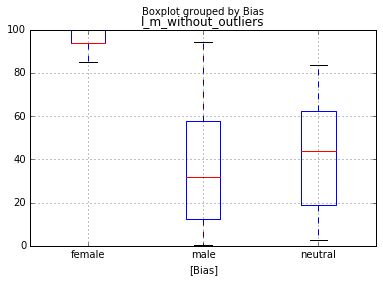

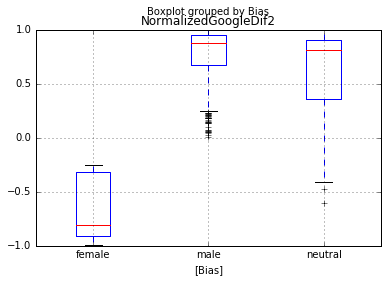

In [88]:
df_df=load_data()
df_google=pd.DataFrame.from_csv("de/predict_GoogleDif_labor_market.csv")
df_google[["l_m_without_outliers","Bias"]].boxplot(by="Bias")
plt.show()
df_google[["NormalizedGoogleDif2","Bias"]].boxplot(by="Bias")

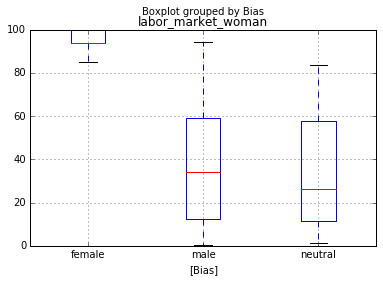

In [85]:
df_df[["labor_market_woman","Bias"]].boxplot(by="Bias")
plt.show()

In [69]:
female_pred_full=predict_model(predict_case="female",train_split=False)

885 859
Optimization terminated successfully.
         Current function value: 0.014341
         Iterations 14
labor_market_woman     0.364305
intercept            -35.534682
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                  Bias2   No. Observations:                  840
Model:                          Logit   Df Residuals:                      838
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:                  0.6064
Time:                        20:10:22   Log-Likelihood:                -12.047
converged:                       True   LL-Null:                       -30.605
                                        LLR p-value:                 1.113e-09
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
labo

In [94]:
print "probability of being in female bias group given 2% of woman in labor market:"
print 1.0/(1+np.exp(-(female_pred_full.params[1]+female_pred_full.params[0]*2)))

print "probability of being in female bias group given 20% of woman in labor market:"
print 1.0/(1+np.exp(-(female_pred_full.params[1]+female_pred_full.params[0]*20)))

print "probability of being in female bias group given 80% of woman in labor market:"
print 1.0/(1+np.exp(-(female_pred_full.params[1]+female_pred_full.params[0]*80)))

print "probability of being in female bias group given 90% of woman in labor market:"
print 1.0/(1+np.exp(-(female_pred_full.params[1]+female_pred_full.params[0]*90)))

print "probability of being in female bias group given 95% of woman in labor market:"
print 1.0/(1+np.exp(-(female_pred_full.params[1]+female_pred_full.params[0]*95)))

print "probability of being in female bias group given 98% of woman in labor market:"
print 1.0/(1+np.exp(-(female_pred_full.params[1]+female_pred_full.params[0]*98)))

print "probability of being in female bias group given 99% of woman in labor market:"
print 1.0/(1+np.exp(-(female_pred_full.params[1]+female_pred_full.params[0]*99)))

probability of being in female bias group given 2% of woman in labor market:
7.65447166167e-16
probability of being in female bias group given 20% of woman in labor market:
5.3925996984e-13
probability of being in female bias group given 80% of woman in labor market:
0.00167499434126
probability of being in female bias group given 90% of woman in labor market:
0.0602439875119
probability of being in female bias group given 95% of woman in labor market:
0.283799589728
probability of being in female bias group given 98% of woman in labor market:
0.54170879189
probability of being in female bias group given 99% of woman in labor market:
0.629839638539


In [207]:
fem_pred=predict_model(predict_case="female")

885 859
672 168 840
Optimization terminated successfully.
         Current function value: 0.017014
         Iterations 14
labor_market_woman     0.344288
intercept            -33.503123
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                  Bias2   No. Observations:                  672
Model:                          Logit   Df Residuals:                      670
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:                  0.6122
Time:                        01:21:33   Log-Likelihood:                -11.433
converged:                       True   LL-Null:                       -29.485
                                        LLR p-value:                 1.871e-09
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------

# predict male

In [210]:
male_pred=predict_model(predict_case="male")

885 859
672 168 840
Optimization terminated successfully.
         Current function value: 0.249603
         Iterations 7
labor_market_woman   -0.000763
intercept             2.639509
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                  Bias2   No. Observations:                  672
Model:                          Logit   Df Residuals:                      670
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:               5.549e-05
Time:                        01:22:02   Log-Likelihood:                -167.73
converged:                       True   LL-Null:                       -167.74
                                        LLR p-value:                    0.8915
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------

In [211]:
male_pred_full=predict_model(predict_case="male",train_split=False)

885 859
Optimization terminated successfully.
         Current function value: 0.248035
         Iterations 7
labor_market_woman   -0.001047
intercept             2.659668
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                  Bias2   No. Observations:                  840
Model:                          Logit   Df Residuals:                      838
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:               0.0001025
Time:                        01:22:09   Log-Likelihood:                -208.35
converged:                       True   LL-Null:                       -208.37
                                        LLR p-value:                    0.8363
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
labor_m

# neutral and female without male case (predict female bias)

In [4]:
fem_neutral_pred_full=predict_model(predict_case="female",remove="male",train_split=False)

885 859
         Current function value: 0.000000
         Iterations: 35
labor_market_woman      45.844612
intercept            -3868.533418
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                  Bias2   No. Observations:                   57
Model:                          Logit   Df Residuals:                       55
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:                   1.000
Time:                        01:58:58   Log-Likelihood:            -7.2260e-12
converged:                      False   LL-Null:                       -16.942
                                        LLR p-value:                 5.849e-09
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
labor_market_woman    45.8446   6.48e

In [5]:
fem_neutral_pred=predict_model(predict_case="female",remove="male")

885 859
45 12 57
         Current function value: 0.000000
         Iterations: 35
labor_market_woman      6.030030
intercept            -534.716167
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                  Bias2   No. Observations:                   45
Model:                          Logit   Df Residuals:                       43
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:                   1.000
Time:                        01:59:06   Log-Likelihood:            -3.2752e-13
converged:                      False   LL-Null:                       -13.498
                                        LLR p-value:                 2.038e-07
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
labor_market_woman     6.0300 

In [6]:
df_df=load_data()


data = df_df[(df_df["Bias2"]==1)|(df_df["Bias2"]==2)]
data["Bias2"]=data.Bias.apply(lambda x: 1 if x=="female" else 0 )

#dummy_wiki = pd.get_dummies(data['Bias2'], prefix='Bias')
#y_all=[dummy_wiki["Bias_2"],dummy_wiki["Bias_1"]]
y=data['Bias2']
X=data[["labor_market_woman" ]]
X=sm.add_constant(X, prepend=False)
X=X.rename(columns = {'const':'intercept'})

#res1 = sm.MNLogit(y, X) 

for i in range(1,100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
    #print len(X_train), len(X_test), len(X_train) + len(X_test)
    #print X_train, Y_train
    res1=sm.Logit(Y_train, X_train)#,method='bfgs') #method='newton')
    try:
        mlogit_res = res1.fit(disp=0)
        if mlogit_res.pvalues[0]<=0.07:

            print mlogit_res.params
            print mlogit_res.summary()
            print mlogit_res.pred_table()
            acc=float(sum(mlogit_res.pred_table().diagonal()))/float(len(Y_train))
            print "Accuracy:",acc
            print "Odds:\n", np.exp(mlogit_res.params)
            print "p:\n", np.exp(mlogit_res.params)/(1+np.exp(mlogit_res.params))
    except:
        pass

885 859


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
            print mlogit_res.params
            print mlogit_res.summary()
            print mlogit_res.pred_table()
            acc=float(sum(mlogit_res.pred_table().diagonal()))/float(len(Y_train))
            print "Accuracy:",acc
            print "Odds:\n", np.exp(mlogit_res.params)
            print "p:\n", np.exp(mlogit_res.params)/(1+np.exp(mlogit_res.params))

labor_market_woman    -0.346991
intercept             31.140306
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                 Bias_1   No. Observations:                   56
Model:                          Logit   Df Residuals:                       54
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Aug 2016   Pseudo R-squ.:                  0.7585
Time:                        20:17:35   Log-Likelihood:                -3.4802
converged:                       True   LL-Null:                       -14.410
                                        LLR p-value:                 2.934e-06
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
labor_market_woman    -0.3470      0.211     -1.643      0.100        -0.761     0.067
intercept             31.140

In [7]:
from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt

# predct male!!!! all data

885 871
Optimization terminated successfully.
         Current function value: 0.283244
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Bias2   No. Observations:                  767
Model:                          Logit   Df Residuals:                      765
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:                0.002524
Time:                        00:38:41   Log-Likelihood:                -217.25
converged:                       True   LL-Null:                       -217.80
                                        LLR p-value:                    0.2944
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
labor_market_woman    -0.0050      0.005     -1.052      0.293        -0.014     0.0

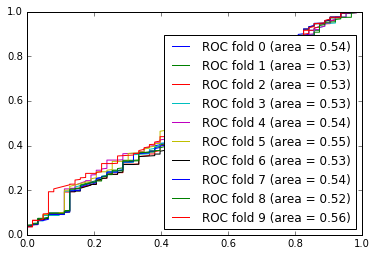

In [170]:



df_df=load_data()
df_df["Bias2"]=df_df.Bias.apply(lambda x: 1 if x=="male" else 0 )

#dummy_wiki = pd.get_dummies(df_df['Bias2'], prefix='Bias')
#y_all=[dummy_wiki["Bias_2"],dummy_wiki["Bias_0"]]

y=df_df["Bias2"]
X=df_df[["labor_market_woman" ]]


X=sm.add_constant(X, prepend=False)
X=X.rename(columns = {'const':'intercept'})
skf = cross_validation.StratifiedKFold(y, n_folds=10,shuffle=True)
aic_min=9999
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
i=0
for train_index, test_index in skf:  
    y_train, y_test = y[train_index], y[test_index]
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]

    res1 = sm.Logit(y_train, X_train)#(y,X)#(y_train, X_train) 
    mlogit_res = res1.fit()
    predict= np.array(mlogit_res.predict() > 0.5, dtype=float)
    print mlogit_res.summary()
    print mlogit_res.pred_table()
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[train_index], mlogit_res.predict())
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    
    aic=mlogit_res.aic
    i+=1
    if aic<aic_min:
        aic_min=aic
        best_res=mlogit_res
        y_train_best=y_train
        best_index=train_index
print best_res.params
print best_res.summary()
print "AIC:",best_res.aic
print "BIC:",best_res.bic
predict= np.array(best_res.predict() > 0.5, dtype=float)
print best_res.pred_table()
acc=float(sum(best_res.pred_table().diagonal()))/float(len(y_train_best))
print "Accuracy:",acc
print "Odds:\n", np.exp(best_res.params)
print "p:\n", np.exp(best_res.params)/(1+np.exp(best_res.params))


plt.legend(loc="lower right")



# predict female

885 871
Optimization terminated successfully.
         Current function value: 0.014222
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                  Bias2   No. Observations:                  853
Model:                          Logit   Df Residuals:                      851
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:                  0.6046
Time:                        00:41:34   Log-Likelihood:                -12.131
converged:                       True   LL-Null:                       -30.682
                                        LLR p-value:                 1.121e-09
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
labor_market_woman     0.3715      0.138      2.688      0.007         0.101     0.

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:516: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


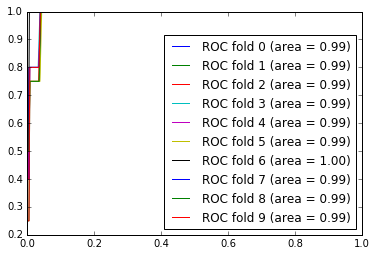

In [171]:
from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt



df_df=load_data()
df_df["Bias2"]=df_df.Bias.apply(lambda x: 1 if x=="female" else 0 )

#dummy_wiki = pd.get_dummies(df_df['Bias2'], prefix='Bias')
#y_all=[dummy_wiki["Bias_2"],dummy_wiki["Bias_0"]]

y=df_df["Bias2"]
X=df_df[["labor_market_woman" ]]




X=sm.add_constant(X, prepend=False)
X=X.rename(columns = {'const':'intercept'})
skf = cross_validation.StratifiedKFold(y, n_folds=10,shuffle=True)
aic_min=9999
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
i=0


res1 = sm.Logit(y, X)#(y,X)#(y_train, X_train) 
mlogit_res = res1.fit()
predict= np.array(mlogit_res.predict() > 0.5, dtype=float)
print mlogit_res.summary()
print mlogit_res.pred_table()



for train_index, test_index in skf:  
    y_train, y_test = y[train_index], y[test_index]
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]#X.iloc[0,:] <- for all train_cols
    #print "train:",len(y_train), "test:",len(y_test)
    res1 = sm.Logit(y_train, X_train)#(y,X)#(y_train, X_train) 
    mlogit_res = res1.fit()
    predict= np.array(mlogit_res.predict() > 0.5, dtype=float)
    print mlogit_res.summary()
    print mlogit_res.pred_table()
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[train_index], mlogit_res.predict())
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    
    aic=mlogit_res.aic
    i+=1
    if aic<aic_min:
        aic_min=aic
        best_res=mlogit_res
        y_train_best=y_train
        best_index=train_index
print best_res.params
print best_res.summary()
print "AIC:",best_res.aic
print "BIC:",best_res.bic
predict= np.array(best_res.predict() > 0.5, dtype=float)
print best_res.pred_table()
acc=float(sum(best_res.pred_table().diagonal()))/float(len(y_train_best))
print "Accuracy:",acc
print "Odds:\n", np.exp(best_res.params)
print "p:\n", np.exp(best_res.params)/(1+np.exp(best_res.params))


plt.legend(loc="lower right")



# femal and neutral (predict neutral)

In [8]:
df_df=load_data()
df_df = df_df[(df_df["Bias2"]==1)|(df_df["Bias2"]==2)]
df_df["Bias2"]=df_df.Bias.apply(lambda x: 1 if x=="neutral" else 0 )

#dummy_wiki = pd.get_dummies(df_df['Bias2'], prefix='Bias')
#y_all=[dummy_wiki["Bias_2"],dummy_wiki["Bias_0"]]

y=df_df["Bias2"]
X=df_df[["labor_market_woman" ]]


X=sm.add_constant(X, prepend=False)
X=X.rename(columns = {'const':'intercept'})
skf = cross_validation.StratifiedKFold(y, n_folds=10,shuffle=True)
aic_min=9999
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
i=0


res1 = sm.Logit(y, X,raise_on_perfect_prediction=False)#(y,X)#(y_train, X_train) 
mlogit_res_ = res1.fit()
predict_= np.array(mlogit_res_.predict() > 0.5, dtype=float)
print mlogit_res_.summary()
print mlogit_res_.pred_table()



for train_index, test_index in skf:  
    y_train, y_test = y.iloc[train_index], y.iloc[train_index]
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]#X.iloc[0,:] <- for all train_cols
    #print "train:",len(y_train), "test:",len(y_test)
    try:
        res1 = sm.Logit(y_train, X_train,method="newton") 
        mlogit_res = res1.fit()

        if mlogit_res.pvalues[0]<=0.07:
            predict= np.array(mlogit_res.predict() > 0.5, dtype=float)
            print mlogit_res.summary()
            print mlogit_res.pred_table()
            # Compute ROC curve and area the curve
            fpr, tpr, thresholds = roc_curve(y[train_index], mlogit_res.predict())
            mean_tpr += interp(mean_fpr, fpr, tpr)
            mean_tpr[0] = 0.0
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
        
            aic_min=aic
            best_res=mlogit_res
            y_train_best=y_train
            best_index=train_index
    except:
        pass
    
print best_res.params
print best_res.summary()
print "AIC:",best_res.aic
print "BIC:",best_res.bic
predict= np.array(best_res.predict() > 0.5, dtype=float)
print best_res.pred_table()
acc=float(sum(best_res.pred_table().diagonal()))/float(len(y_train_best))
print "Accuracy:",acc
print "Odds:\n", np.exp(best_res.params)
print "p:\n", np.exp(best_res.params)/(1+np.exp(best_res.params))

plt.legend(loc="lower right")


885 859
         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Bias2   No. Observations:                   57
Model:                          Logit   Df Residuals:                       55
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:                   1.000
Time:                        02:00:33   Log-Likelihood:            -7.2260e-12
converged:                      False   LL-Null:                       -16.942
                                        LLR p-value:                 5.849e-09
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
labor_market_woman   -45.8446   6.48e+05  -7.07e-05      1.000     -1.27e+06  1.27e+06
intercept           3868.5334   5

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:516: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


NameError: name 'best_res' is not defined

In [10]:
mlogit_res_.params[1]

3868.533417855142

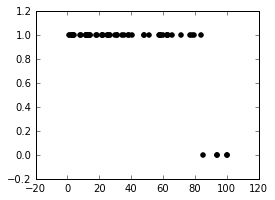

In [9]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.labor_market_woman.values, y.values, color='black', zorder=20)

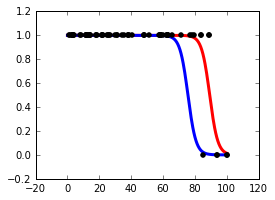

In [174]:
#and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.labor_market_woman.values, y.values, color='black', zorder=20)
X_t = X.labor_market_woman.values
X_test = np.linspace(0, 100, 300)

def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * mlogit_res_.params[0] + mlogit_res_.params[1]).ravel()
plt.plot(X_test, loss, color='r', linewidth=3)
loss = model(X_test * mlogit_res_.params[0] + 30).ravel()
plt.plot(X_test, loss, color='blue', linewidth=3)

In [12]:
import numpy as np

#conda install -c glemaitre imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

from imblearn.ensemble import EasyEnsemble
X_t = X.labor_market_woman.values.reshape((len(X),1))
y_t=y.values.reshape((len(y),1))
ratio = 'auto'
# 'Random over-sampling'
OS = RandomOverSampler(ratio=ratio)
osx, osy = OS.fit_sample(X_t, y_t)
# 'SMOTE'
smote = SMOTE(ratio=ratio, kind='regular',k=4)
smox, smoy = smote.fit_sample(X_t, y_t)

print len(X), len(y)
# 'SMOTE Tomek links'
STK = SMOTETomek(ratio=ratio,k=4)
stkx, stky = STK.fit_sample(X_t, y_t)


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

57 57


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
# 'SMOTE ENN'
SENN = SMOTEENN(ratio=ratio,k=4)
ennx, enny = SENN.fit_sample(X_t.ravel(), y_t.ravel())

(array([ 99.84313725,  93.69190951,  93.69190951,  99.84313725,
         84.95967218,  83.81020887,  83.81020887,  35.50863724,
         76.99332332,  26.2594162 ,  47.89403922,  47.89403922,
         18.1568088 ,  18.1568088 ,  79.44435839,   2.73770282,
         70.9736681 ,  58.61399592,  58.61399592,  62.997543  ,
         62.997543  ,  25.59987302,   1.46126423,  11.43816056,
          3.55635708,  21.57658998,  13.1710869 ,  31.10416667,
         14.35763678,   1.22249389,   8.0697928 ,  47.89403922,
         24.97683109,  38.66675106,  34.47319778,  18.44934276,
          3.90146034,   3.55635708,  31.08710312,  22.24113475,
         57.69387589,  12.59051361,   3.55635708,  29.75964579,
         11.63090632,  65.26483054,  40.1872883 ,  37.70050477,
         58.3260838 ,  58.3260838 ,   8.49660524,  51.14451586,
         21.57658998,  21.57658998,  88.7755102 ,  11.43816056,
          2.72014753,  88.7755102 ,  62.57110353,  62.57110353,
         62.57110353,  62.57110353,  78.

# McFadden's pseudo-R-squared


In [63]:
import scipy
from scipy.stats import chisqprob



def perform_fitting_new_dataset(osx,osy):
    new_df=pd.DataFrame(data=osx,columns=["labor_market_woman"])
    new_df["Bias_1"]=osy

    y_=new_df["Bias_1"]
    X_=new_df[["labor_market_woman" ]]
    X_=sm.add_constant(X_, prepend=False)
    X_=X_.rename(columns = {'const':'intercept'})
    res1 = sm.Logit(y_, X_)
    mlogit_res_ = res1.fit()
    predict_= np.array(mlogit_res.predict() > 0.5, dtype=float)
    print mlogit_res_.summary()
    print mlogit_res_.pred_table()
    acc_=float(sum(mlogit_res_.pred_table().diagonal()))/float(len(y_))
    print "Accuracy:",acc_
    print "Odds:\n", np.exp(mlogit_res_.params)
    print "p:\n", np.exp(mlogit_res_.params)/(1+np.exp(mlogit_res_.params))
    
    return mlogit_res_

def model(x):
        return 1 / (1 + np.exp(-x))
    
def plot_results(X,y,mlogit_res_):
    #and plot the result
    plt.figure(1, figsize=(4, 3))
    plt.clf()
    plt.scatter(X.labor_market_woman.values, y.values, color='black', zorder=20)
    X_test = np.linspace(0, 100, 300)
    loss = model(X_test * mlogit_res_.params[0] + mlogit_res_.params[1]).ravel()
    plt.plot(X_test, loss, color='r', linewidth=3)
    plt.show()

def logit(mX, vBeta):
    return((1/(1.0 + np.exp(-np.dot(mX, vBeta).astype("float")))))

def logLikelihoodLogit(vBeta, mX, vY):
    a=1.-logit(mX, vBeta)
    a[a == 0] = 1e-25
    return(-(np.sum(vY*np.log(logit(mX, vBeta)) + (1-vY)*(np.log(a)))))

def caclulate_trueR2(X,y,mlogit_res_):
    vY=y.values
    mX = X.values[:,0:1]
    intercept = np.ones(mX.shape[0]).reshape(mX.shape[0], 1)
    mX = np.concatenate((intercept, mX), axis = 1)
    vBeta = np.array([mlogit_res_.params[1], mlogit_res_.params[0]])

    #print logLikelihoodLogit(vBeta, mX, vY)

    #null-model
    res1_h= sm.Logit(y, X["labor_market_woman"]).fit(disp=False)
    #print res1_h.llf
    #print logLikelihoodLogit(np.array([0.0, res1_h.params[0]]), mX, vY)
    #print logLikelihoodLogit(np.array([res1_h.params[0]]), df_df.values[:, 1:2], vY)

    #McFadden's pseudo-R-squared. `1 - (llf / llnull)`
    r2_pseudo=1- logLikelihoodLogit(vBeta, mX, vY)/logLikelihoodLogit(np.array([0.0, res1_h.params[0]]), mX, vY)
    print "McFadden's pseudo-R-squared",r2_pseudo
    return r2_pseudo


def ci_p_val_z_score(mlogit_res_,osx,osy):
    # Calculate matrix of predicted class probabilities. 
    predProbs = np.matrix(np.array(zip(np.array(1-mlogit_res_.predict(X)).astype("float"),
                           np.array(mlogit_res_.predict(X)).astype("float"))))
    # Design matrix -- add column of 1's at the beginning of your X_train matrix
    X_design = np.concatenate((np.ones( X.shape[0]).reshape(X.shape[0], 1),
                    X.values[:,0].reshape(X.shape[0], 1)),axis=1)
    # Initiate matrix of 0's, fill diagonal with each predicted observation's variance
    V = np.matrix(np.zeros(shape = (X_design.shape[0], X_design.shape[0])))
    #np.fill_diagonal(V, np.multiply(predProbs[:,0], predProbs[:,1]).A1)
    np.fill_diagonal(V, np.multiply(predProbs[:,0], predProbs[:,1]).A1)
    # Covariance matrix
    covLogit = np.linalg.inv(X_design.T * V * X_design)
    #print "Covariance matrix: ", covLogit
    # Standard errors
    sdd=np.sqrt(np.diag(covLogit))
    print "Standard errors: ", sdd

    # Wald statistic (coefficient / s.e.) ^ 2
    #logitParams = np.insert(mlogit_res_.params[0], 0, mlogit_res_.params[1])
    logitParams = mlogit_res_.params[0]
    logitParams_intercept = mlogit_res_.params[1]
    print "Wald statistics: ", ((logitParams / np.sqrt(np.diag(covLogit))) ** 2)[1]
    print "Wald statistics intercept: ", ((logitParams_intercept / np.sqrt(np.diag(covLogit))) ** 2)[0]
    wald_score=((logitParams / np.sqrt(np.diag(covLogit))) ** 2 )[1]
    wald_score_intercept=((logitParams_intercept / np.sqrt(np.diag(covLogit))) ** 2)[0]
    print "p_val coef",chisqprob(wald_score,1)
    print "p_val intercept",chisqprob(wald_score_intercept,1)


    # upper CI for beta
    #print np.exp(mlogit_res_.params[0]+1.96*sdd[1])
    # lower CI for beta
    #print np.exp(mlogit_res_.params[0]-1.96*sdd[1])
    #print np.exp(mlogit_res_.params[0])
    # critical value of the t-statistic



    i=0
    # the estimated coefficient, and its variance
    beta = mlogit_res_.params[i]
    se = sdd[1]
    t = beta / se
    print 't =', t

    print "p_val:",2* (1 - scipy.stats.norm.cdf(abs(t)))
    print "CI:"
    # the confidence interval
    print beta - 1.96 * se, beta + 1.96 * se
    

    predict_model_scikit(osx,osy)


885 859
==========Randomly generated dataset:
         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Bias_1   No. Observations:                  104
Model:                          Logit   Df Residuals:                      102
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:                   1.000
Time:                        02:55:39   Log-Likelihood:            -9.4280e-12
converged:                      False   LL-Null:                       -72.087
                                        LLR p-value:                 3.254e-33
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
labor_market_woman   -47.2118   5.75e+05  -8.22e-05      1.000     -1.13e+06  1.13

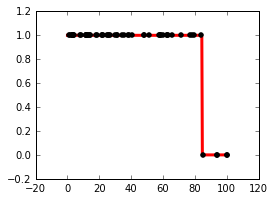

McFadden's pseudo-R-squared nan
Standard errors:  [ 95549561.75089808   1137737.85043725]
Wald statistics:  1.72193522467e-09
Wald statistics intercept:  1.73773457362e-09
p_val coef 0.999966890817
p_val intercept 0.99996673927
t = -4.14962073528e-05
p_val: 0.999966890817
CI:
-2230013.39866 2229918.97505
===== new fold
Coef: -0.71482527989  intercept: 58.9526720325
0.95652173913


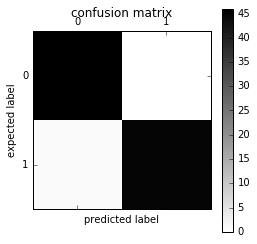

[[46  0]
 [ 1 45]]
Standard errors:  [ 35.21407536   0.41949242]
Wald statistics:  [ 2.80268578  2.90369888]
p_val coef 0.088376543954
p_val intercep 0.0941065480655
1.11335709056
0.215018670154
t = -1.70402431931
p_val: 0.088376543954
CI:
-1.5370304167 0.107379856919
===== new fold
Coef: -1.15572353964  intercept: 96.0087792767
0.95652173913


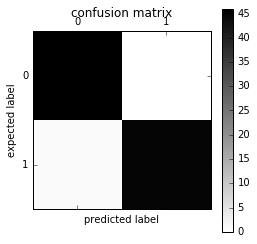

[[46  0]
 [ 1 45]]
Standard errors:  [ 93.1438836    1.10158147]
Wald statistics:  [ 1.06246153  1.10071446]
p_val coef 0.294109363748
p_val intercep 0.302654438737
2.72747465932
0.0363404720181
t = -1.04914939815
p_val: 0.294109363748
CI:
-3.31482322716 1.00337614787
===== new fold
Coef: -0.536011103554  intercept: 43.8542961589
0.957446808511


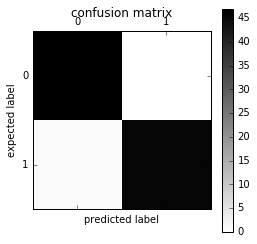

[[47  0]
 [ 1 46]]
Standard errors:  [ 21.74634152   0.26028383]
Wald statistics:  [ 4.06679126  4.24085281]
p_val coef 0.0394623397841
p_val intercep 0.0437342769823
0.974476573963
0.351281491179
t = -2.05933309913
p_val: 0.0394623397841
CI:
-1.04616740775 -0.0258547993555
===== new fold
Coef: -0.544775573365  intercept: 44.584808741
0.957446808511


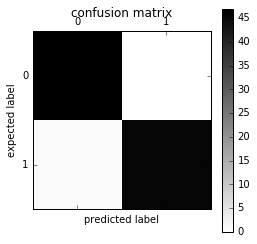

[[47  0]
 [ 1 46]]
Standard errors:  [ 22.01620434   0.26342895]
Wald statistics:  [ 4.10099199  4.2766947 ]
p_val coef 0.0386384158426
p_val intercep 0.0428580606407
0.971946196539
0.346076192953
t = -2.06801709266
p_val: 0.0386384158426
CI:
-1.06109631732 -0.0284548294084
===== new fold
Coef: -0.533807051032  intercept: 43.2569298686
0.957446808511


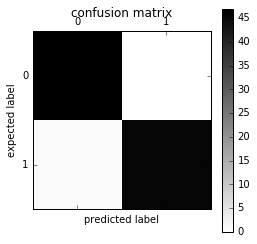

[[47  0]
 [ 1 46]]
Standard errors:  [ 28.93023827   0.34332501]
Wald statistics:  [ 2.23566827  2.41745123]
p_val coef 0.119990016895
p_val intercep 0.134858307115
1.14925048096
0.299175752803
t = -1.55481549848
p_val: 0.119990016895
CI:
-1.20672407626 0.139109974199
===== new fold
Coef: -0.788003615941  intercept: 64.9676737938
0.957446808511


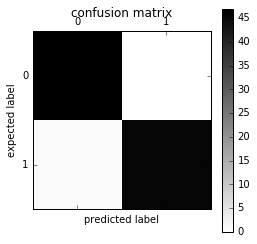

[[47  0]
 [ 1 46]]
Standard errors:  [ 43.41170868   0.51586621]
Wald statistics:  [ 2.23965371  2.33336269]
p_val coef 0.126628070456
p_val intercep 0.134511101228
1.2499382682
0.165447493134
t = -1.52753484073
p_val: 0.126628070456
CI:
-1.79910139653 0.223094164653
===== new fold
Coef: -0.547099788408  intercept: 44.0602997241
1.0


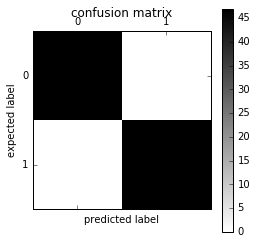

[[47  0]
 [ 0 47]]
Standard errors:  [ 21.57970004   0.26272018]
Wald statistics:  [ 4.16873307  4.33656854]
p_val coef 0.0373020309409
p_val intercep 0.0411765792491
0.968343665723
0.345752752098
t = -2.08244292644
p_val: 0.0373020309409
CI:
-1.06203134868 -0.0321682281394
===== new fold
Coef: -0.728918159635  intercept: 60.0141566429
0.957446808511


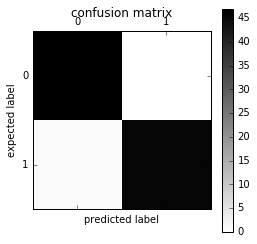

[[47  0]
 [ 1 46]]
Standard errors:  [ 35.05891532   0.41766207]
Wald statistics:  [ 2.93028906  3.0458427 ]
p_val coef 0.0809440959489
p_val intercep 0.0869319262138
1.09384552673
0.21277163749
t = -1.74523428275
p_val: 0.0809440959489
CI:
-1.54753581287 0.0896994935965
===== new fold
Coef: -0.546818971397  intercept: 44.6573031008
0.957446808511


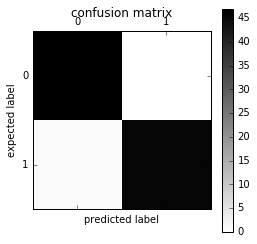

[[47  0]
 [ 1 46]]
Standard errors:  [ 21.88551738   0.26202695]
Wald statistics:  [ 4.16362252  4.35507098]
p_val coef 0.0368989215869
p_val intercep 0.0413009834178
0.967300422072
0.346320100608
t = -2.08688068145
p_val: 0.0368989215869
CI:
-1.06039178534 -0.0332461574534
===== new fold
Coef: -0.54012148634  intercept: 44.1979277634
0.957446808511


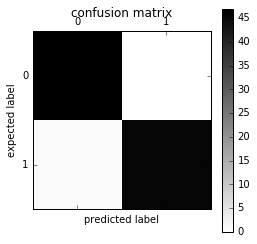

[[47  0]
 [ 1 46]]
Standard errors:  [ 21.96096846   0.26284219]
Wald statistics:  [ 4.05042728  4.22272464]
p_val coef 0.0398860641014
p_val intercep 0.0441601663207
0.975357899737
0.348090709395
t = -2.05492691762
p_val: 0.0398860641014
CI:
-1.05529217399 -0.0249507986872


In [66]:
df_df=load_data()
df_df = df_df[(df_df["Bias2"]==1)|(df_df["Bias2"]==2)]
df_df["Bias2"]=df_df.Bias.apply(lambda x: 1 if x=="neutral" else 0 )
y=df_df["Bias2"]
X=df_df[["labor_market_woman" ]]
X=sm.add_constant(X, prepend=False)
X=X.rename(columns = {'const':'intercept'})




print "==========Randomly generated dataset:"
mlogit_res_=perform_fitting_new_dataset(osx,osy)
plot_results(X,y,mlogit_res_)
r2_1=caclulate_trueR2(X,y,mlogit_res_)
ci_p_val_z_score(mlogit_res_,osx,osy)

==========SMOTE:
         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Bias_1   No. Observations:                  104
Model:                          Logit   Df Residuals:                      102
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:                   1.000
Time:                        02:59:24   Log-Likelihood:            -1.0370e-11
converged:                      False   LL-Null:                       -72.087
                                        LLR p-value:                 3.254e-33
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
labor_market_woman   -45.2259   5.44e+05  -8.31e-05      1.000     -1.07e+06  1.07e+06
intercept           3816

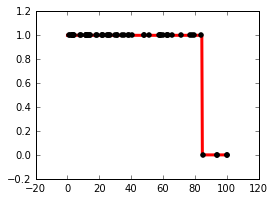

McFadden's pseudo-R-squared 1.0
Standard errors:  [ 45976968.53139129    544383.45815879]
Wald statistics:  6.90184317076e-09
Wald statistics intercept:  6.89052085304e-09
p_val coef 0.999933713879
p_val intercept 0.999933768272
t = -8.30773324726e-05
p_val: 0.999933713879
CI:
-1067036.80392 1066946.35207
===== new fold
Coef: -0.565779145341  intercept: 47.0626646367
0.95652173913


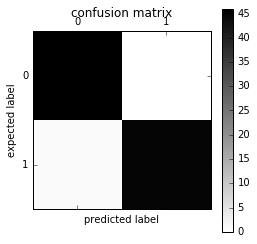

[[46  0]
 [ 1 45]]
Standard errors:  [ 22.89756124   0.26702035]
Wald statistics:  [ 4.22449273  4.489574  ]
p_val coef 0.0341021746061
p_val intercep 0.0398445277251
0.958467858255
0.336506087224
t = -2.11886148646
p_val: 0.0341021746061
CI:
-1.08913904024 -0.0424192504386
===== new fold
Coef: -0.739913441897  intercept: 60.6945352627
1.0


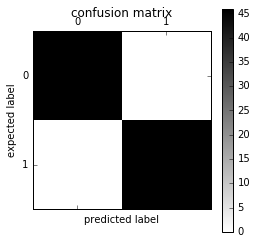

[[46  0]
 [ 0 46]]
Standard errors:  [ 32.33014176   0.39091007]
Wald statistics:  [ 3.52439002  3.58268073]
p_val coef 0.0583848620983
p_val intercep 0.060472072964
1.02661841054
0.221773832643
t = -1.8927970646
p_val: 0.0583848620983
CI:
-1.50609718829 0.0262703044965
===== new fold
Coef: -0.574629763322  intercept: 47.8300350734
0.957446808511


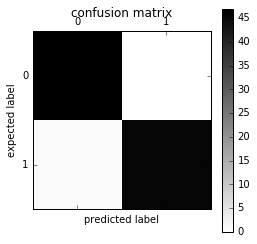

[[47  0]
 [ 1 46]]
Standard errors:  [ 21.56396429   0.25270372]
Wald statistics:  [ 4.9197631   5.17074331]
p_val coef 0.0229703852099
p_val intercep 0.0265511576302
0.923734597546
0.343032856125
t = -2.27392684708
p_val: 0.0229703852099
CI:
-1.06992904595 -0.0793304806921
===== new fold
Coef: -0.589874674528  intercept: 49.1139168867
0.957446808511


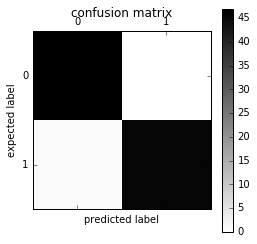

[[47  0]
 [ 1 46]]
Standard errors:  [ 22.45333162   0.26303637]
Wald statistics:  [ 4.78462121  5.02907247]
p_val coef 0.0249252436021
p_val intercep 0.0287149626815
0.928371421288
0.331069829286
t = -2.24255935707
p_val: 0.0249252436021
CI:
-1.10542596124 -0.0743233878126
===== new fold
Coef: -0.557295206753  intercept: 46.4079870458
0.957446808511


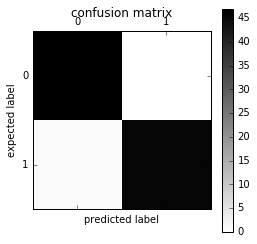

[[47  0]
 [ 1 46]]
Standard errors:  [ 20.62554962   0.24169135]
Wald statistics:  [ 5.06260917  5.3167764 ]
p_val coef 0.0211210495092
p_val intercep 0.0244474052999
0.919817352737
0.356646474545
t = -2.30581360833
p_val: 0.0211210495092
CI:
-1.03101025522 -0.0835801582825
===== new fold
Coef: -0.588974541291  intercept: 49.0051756401
0.957446808511


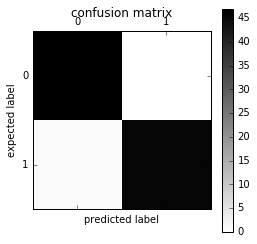

[[47  0]
 [ 1 46]]
Standard errors:  [ 22.10735607   0.25893835]
Wald statistics:  [ 4.91371867  5.17368851]
p_val coef 0.0229314758068
p_val intercep 0.0266442191542
0.921773850901
0.334040272792
t = -2.27457435766
p_val: 0.0229314758068
CI:
-1.09649371605 -0.0814553665298
===== new fold
Coef: -0.573253405786  intercept: 47.6649165983
0.957446808511


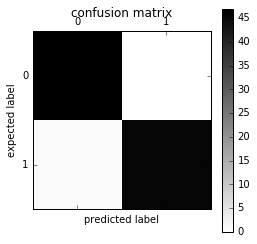

[[47  0]
 [ 1 46]]
Standard errors:  [ 21.1967546   0.2482929]
Wald statistics:  [ 5.05660385  5.33045999]
p_val coef 0.0209558536726
p_val intercep 0.0245322663924
0.917044460341
0.346487863053
t = -2.30877889629
p_val: 0.0209558536726
CI:
-1.05990748823 -0.0865993233419
===== new fold
Coef: -0.548826469437  intercept: 45.4836921475
0.957446808511


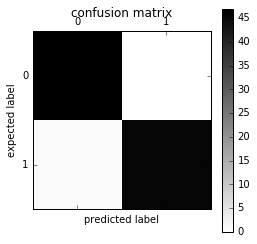

[[47  0]
 [ 1 46]]
Standard errors:  [ 22.53165093   0.26280951]
Wald statistics:  [ 4.07497918  4.36101882]
p_val coef 0.0367703082152
p_val intercep 0.0435228024615
0.966842338033
0.345095841291
t = -2.08830524968
p_val: 0.0367703082152
CI:
-1.06393309969 -0.0337198391868
===== new fold
Coef: -0.714826646347  intercept: 60.1706619674
1.0


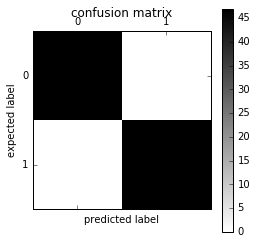

[[47  0]
 [ 0 47]]
Standard errors:  [ 32.95892064   0.38228689]
Wald statistics:  [ 3.33291024  3.49641241]
p_val coef 0.0615019250116
p_val intercep 0.0679066188654
1.03505613451
0.231283984316
t = -1.86986962349
p_val: 0.0615019250116
CI:
-1.46410895418 0.0344556614881
===== new fold
Coef: -0.572827510349  intercept: 47.7080542615
0.957446808511


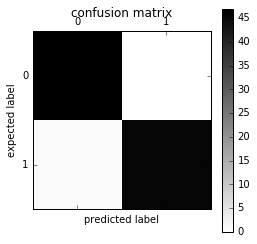

[[47  0]
 [ 1 46]]
Standard errors:  [ 21.12456519   0.24719225]
Wald statistics:  [ 5.10044245  5.37004651]
p_val coef 0.020485431362
p_val intercep 0.0239197413198
0.915458077226
0.347384059086
t = -2.31733607971
p_val: 0.020485431362
CI:
-1.05732431257 -0.0883307081319


In [67]:
print "==========SMOTE:"
mlogit_res_=perform_fitting_new_dataset(smox, smoy)
plot_results(X,y,mlogit_res_)
r2_1=caclulate_trueR2(X,y,mlogit_res_)
ci_p_val_z_score(mlogit_res_,smox, smoy)

========== SMOTE Tomek links
         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Bias_1   No. Observations:                  104
Model:                          Logit   Df Residuals:                      102
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:                   1.000
Time:                        03:01:50   Log-Likelihood:            -1.0793e-11
converged:                      False   LL-Null:                       -72.087
                                        LLR p-value:                 3.254e-33
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
labor_market_woman   -45.1842   5.42e+05  -8.33e-05      1.000     -1.06e+06  1.06e+06
intercept   

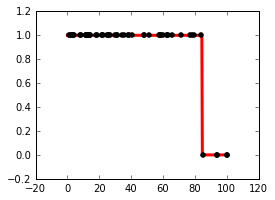

McFadden's pseudo-R-squared 1.0
Standard errors:  [ 45821883.71881928    542207.06458075]
Wald statistics:  6.94451617672e-09
Wald statistics intercept:  6.92477919351e-09
p_val coef 0.999933509277
p_val intercept 0.99993360383
t = -8.33337637259e-05
p_val: 0.999933509277
CI:
-1062771.03073 1062680.66242
===== new fold
Coef: -0.565398191426  intercept: 46.6196352939
0.95652173913


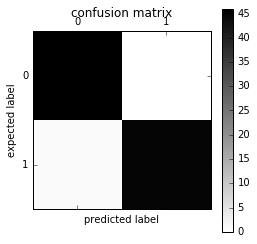

[[46  0]
 [ 1 45]]
Standard errors:  [ 20.41929997   0.24072523]
Wald statistics:  [ 5.21261975  5.51652541]
p_val coef 0.0188376386183
p_val intercep 0.0224235223956
0.910668122868
0.354438782451
t = -2.34872846588
p_val: 0.0188376386183
CI:
-1.03721963494 -0.0935767479108
===== new fold
Coef: -0.799310647001  intercept: 66.5451607554
0.95652173913


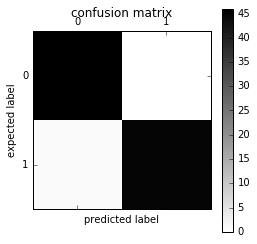

[[46  0]
 [ 1 45]]
Standard errors:  [ 43.59812696   0.51038956]
Wald statistics:  [ 2.32968548  2.45260514]
p_val coef 0.117329995937
p_val intercep 0.126927520338
1.22268943381
0.165352754606
t = -1.56607954583
p_val: 0.117329995937
CI:
-1.79967418045 0.201052886445
===== new fold
Coef: -0.595066697099  intercept: 49.1029203827
0.957446808511


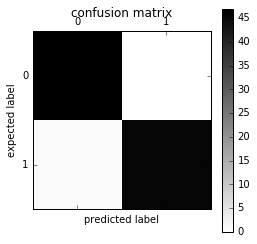

[[47  0]
 [ 1 46]]
Standard errors:  [ 22.19554939   0.26171723]
Wald statistics:  [ 4.89421278  5.1697157 ]
p_val coef 0.0229839771116
p_val intercep 0.0269468562676
0.921178983137
0.330208017107
t = -2.27370088205
p_val: 0.0229839771116
CI:
-1.10803246824 -0.0821009259543
===== new fold
Coef: -0.588695877528  intercept: 48.7505921224
0.957446808511


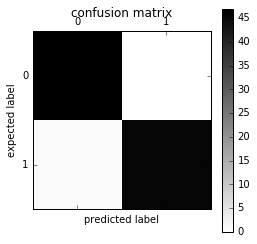

[[47  0]
 [ 1 46]]
Standard errors:  [ 21.8804626    0.25687989]
Wald statistics:  [ 4.96417166  5.25196452]
p_val coef 0.0219220076229
p_val intercep 0.0258777068382
0.918318225566
0.335484186581
t = -2.29171650076
p_val: 0.0219220076229
CI:
-1.09218045757 -0.0852112974883
===== new fold
Coef: -0.604329108665  intercept: 49.9130495835
0.957446808511


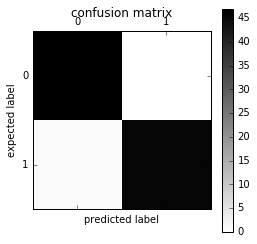

[[47  0]
 [ 1 46]]
Standard errors:  [ 22.57188961   0.26598913]
Wald statistics:  [ 4.8898144   5.16201483]
p_val coef 0.0230861004921
p_val intercep 0.0270155902721
0.920359970203
0.324435735575
t = -2.27200678558
p_val: 0.0230861004921
CI:
-1.12566780382 -0.0829904135066
===== new fold
Coef: -0.662746738002  intercept: 54.8756360711
0.957446808511


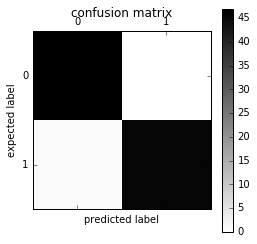

[[47  0]
 [ 1 46]]
Standard errors:  [ 27.23851098   0.32105365]
Wald statistics:  [ 4.058751    4.26127914]
p_val coef 0.0389905514427
p_val intercep 0.0439429901701
0.967072713998
0.274717526635
t = -2.06428659283
p_val: 0.0389905514427
CI:
-1.2920118851 -0.0334815909078
===== new fold
Coef: -0.547189454649  intercept: 44.9583299764
0.957446808511


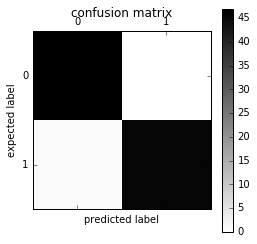

[[47  0]
 [ 1 46]]
Standard errors:  [ 21.83878099   0.25666008]
Wald statistics:  [ 4.2380254   4.54526047]
p_val coef 0.0330099994474
p_val intercep 0.0395281151151
0.956824116086
0.349852648254
t = -2.13196164895
p_val: 0.0330099994474
CI:
-1.05024321813 -0.0441356911642
===== new fold
Coef: -0.595866232925  intercept: 49.1567680071
0.957446808511


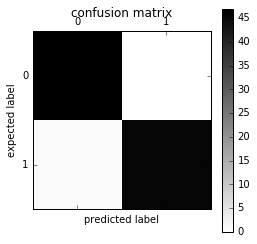

[[47  0]
 [ 1 46]]
Standard errors:  [ 22.08674772   0.26037138]
Wald statistics:  [ 4.95339659  5.2373435 ]
p_val coef 0.0221070063273
p_val intercep 0.0260394615896
0.918017957509
0.330815606513
t = -2.28852430558
p_val: 0.0221070063273
CI:
-1.10619413885 -0.0855383269968
===== new fold
Coef: -0.680708183117  intercept: 56.5982806574
0.957446808511


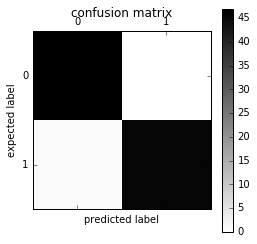

[[47  0]
 [ 1 46]]
Standard errors:  [ 29.86882685   0.35060436]
Wald statistics:  [ 3.59062579  3.76953105]
p_val coef 0.0521942642949
p_val intercep 0.0581063580993
1.00649737408
0.254642997802
t = -1.94152801869
p_val: 0.0521942642949
CI:
-1.36789272337 0.0064763571347
===== new fold
Coef: -0.832299646699  intercept: 67.9662569316
1.0


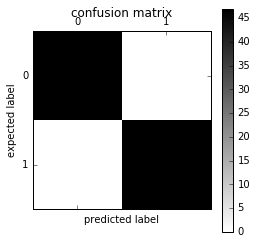

[[47  0]
 [ 0 47]]
Standard errors:  [ 35.35938224   0.42838112]
Wald statistics:  [ 3.69468458  3.77484199]
p_val coef 0.0520288147835
p_val intercep 0.0545861022429
1.00735425843
0.187884730257
t = -1.94289525986
p_val: 0.0520288147835
CI:
-1.67192664113 0.00732734773182


In [68]:
print "========== SMOTE Tomek links"
mlogit_res_=perform_fitting_new_dataset(stkx, stky)
plot_results(X,y,mlogit_res_)
r2_1=caclulate_trueR2(X,y,mlogit_res_)

ci_p_val_z_score(mlogit_res_,stkx, stky)

In [52]:
import scikits.bootstrap as boot
from sklearn.linear_model import LogisticRegression


#====== predict neutral!!!!!    
df_df=load_data()


data = df_df[(df_df["Bias2"]==1)|(df_df["Bias2"]==2)]
data["Bias2"]=data.Bias.apply(lambda x: 1 if x=="neutral" else 0 )



y=data['Bias2'].values.reshape((len(data),1))
X=data["labor_market_woman"].values.reshape((len(data),1))

X_train=X[:,:]
Y_train=y[:,:]

def my_function2(train_index):
    while len(unique(Y_train.ravel()[train_index]))!=2:
        train_index=boot.bootstrap_indexes(np.arange(len(Y_train)), n_samples=1)[0]
    model = LogisticRegression(C=1e5)
    model = model.fit(X_train[train_index],Y_train.ravel()[train_index])
    return model.coef_[0][0],model.intercept_[0]

conf_par_intercept=boot.ci(np.arange(len(X_train)), statfunction=my_function2, alpha=0.05, n_samples=10000, method='bca')
print conf_par_intercept
print "intercept:",conf_par_intercept[:,1]
print "coef:",conf_par_intercept[:,0]

885 859
[[  -2.88965676   37.93018982]
 [  -0.46911217  239.8321109 ]]
intercept: [  37.93018982  239.8321109 ]
coef: [-2.88965676 -0.46911217]


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [65]:

def ci_p_val_z_score_scikit(model,X_train):
    # Calculate matrix of predicted class probabilities. 
    predProbs = np.matrix(model.predict_proba(X_train))
    # Design matrix -- add column of 1's at the beginning of your X_train matrix
    X_design = np.concatenate((np.ones( X_train.shape[0]).reshape(X_train.shape[0], 1),
                    X_train[:,0].reshape(X_train.shape[0], 1)),axis=1)
    # Initiate matrix of 0's, fill diagonal with each predicted observation's variance
    V = np.matrix(np.zeros(shape = (X_design.shape[0], X_design.shape[0])))
    #np.fill_diagonal(V, np.multiply(predProbs[:,0], predProbs[:,1]).A1)
    np.fill_diagonal(V, np.multiply(predProbs[:,0], predProbs[:,1]).A1)
    # Covariance matrix
    covLogit = np.linalg.inv(X_design.T * V * X_design)
    #print "Covariance matrix: ", covLogit
    # Standard errors
    sdd=np.sqrt(np.diag(covLogit))
    print "Standard errors: ", sdd
    # Wald statistic (coefficient / s.e.) ^ 2
    logitParams = np.insert(model.coef_[0], 0, model.intercept_[0])
    print "Wald statistics: ", ((logitParams / sdd) ** 2)
    #print "Wald statistics intercept: ", ((logitParams_intercept / sdd** 2)[0]
    wald_score=((logitParams / sdd) ** 2 )
    #wald_score_intercept=((logitParams_intercept / np.sqrt(np.diag(covLogit))) ** 2)[0]
    print "p_val coef",chisqprob(wald_score[1],1)
    print "p_val intercep",chisqprob(wald_score[0],1)
    #print "p_val intercept",chisqprob(wald_score_intercept,1)

    # upper CI for beta
    print np.exp(model.coef_[0][0]+1.96*sdd[1])
    # lower CI for beta
    print np.exp(model.coef_[0][0]-1.96*sdd[1])
    #print np.exp(mlogit_res_.params[0])
    # critical value of the t-statistic





    i=0
    # the estimated coefficient, and its variance
    beta = model.coef_[0][0]
    se = sdd[1]
    t = beta / se
    print 't =', t

    print "p_val:",2* (1 - scipy.stats.norm.cdf(abs(t)))
    print "CI:"
    # the confidence interval
    print beta - 1.96 * se, beta + 1.96 * se 
    
def predict_model_scikit(X,y):
    X_train=X
    Y_train=y
    model = LogisticRegression(C=1e5)



    skf = cross_validation.StratifiedKFold(Y_train.ravel(), n_folds=10,shuffle=True)
    for train_index,test_index in skf:
        print "===== new fold"
        model = model.fit(X_train[train_index,:],Y_train.ravel()[train_index])
        print "Coef:", model.coef_[0][0]," intercept:",model.intercept_[0]
        y_true=Y_train.ravel()[train_index]
        y_pred=model.predict(X_train[train_index,:])


        target_names = ['female',  'neutral']
        #print(classification_report(y_true, y_pred, target_names=target_names))
        print r2_score(y_true, y_pred)

        plt.matshow(confusion_matrix(y_true, y_pred), cmap=plt.cm.binary, interpolation='nearest')
        plt.title('confusion matrix')
        plt.colorbar()
        plt.ylabel('expected label')
        plt.xlabel('predicted label')
        plt.show()

        #print classification_report(y_true, y_pred)
        print confusion_matrix(y_true, y_pred)   
        ci_p_val_z_score_scikit(model,X_train[train_index,:])
        
        

===== new fold
Coef: -1.52104001008  intercept: 128.344502067
1.0


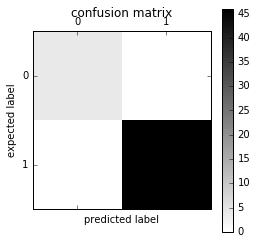

[[ 4  0]
 [ 0 46]]
Standard errors:  [ 216.87090579    2.57021878]
Wald statistics:  [ 0.35022888  0.35022012]
p_val coef 0.553988552739
p_val intercep 0.553983596722
33.6693793777
0.0014177717632
t = -0.591793983212
p_val: 0.553988552739
CI:
-6.55866882067 3.5165888005
===== new fold
Coef: -1.11439015449  intercept: 91.7336178242
1.0


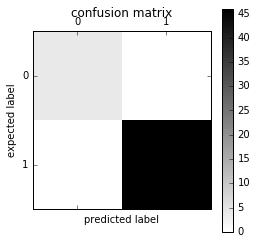

[[ 4  0]
 [ 0 46]]
Standard errors:  [ 87.15010656   1.06362319]
Wald statistics:  [ 1.10795264  1.09773861]
p_val coef 0.294762922062
p_val intercep 0.292527431474
2.63876577389
0.0407992489053
t = -1.04773021587
p_val: 0.294762922062
CI:
-3.19909160693 0.970311297952
===== new fold
Coef: -1.32186510172  intercept: 111.539546483
1.0


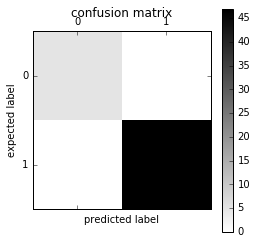

[[ 5  0]
 [ 0 47]]
Standard errors:  [ 190.81767017    2.26183217]
Wald statistics:  [ 0.3416808  0.3415494]
p_val coef 0.558936243952
p_val intercep 0.558860637374
22.4507932896
0.00316672878522
t = -0.584422274948
p_val: 0.558936243952
CI:
-5.75505615285 3.1113259494
===== new fold
Coef: -1.02683648295  intercept: 86.6564035855
1.0


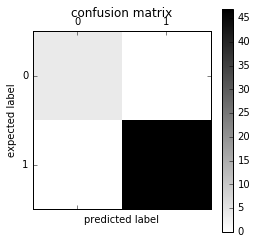

[[ 4  0]
 [ 0 47]]
Standard errors:  [ 131.49844256    1.55997697]
Wald statistics:  [ 0.43427027  0.43327757]
p_val coef 0.510385061256
p_val intercep 0.509900994133
7.61955811183
0.0168333819485
t = -0.658238232338
p_val: 0.510385061256
CI:
-4.08439134334 2.03071837744
===== new fold
Coef: -0.944257430524  intercept: 83.4065947521
1.0


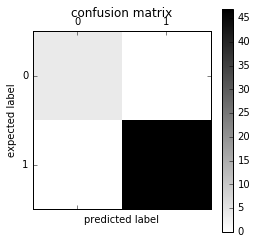

[[ 4  0]
 [ 0 47]]
Standard errors:  [ 108.36270743    1.22322167]
Wald statistics:  [ 0.59243552  0.59589603]
p_val coef 0.440148175265
p_val intercep 0.441478861979
4.27702228412
0.0353742225551
t = -0.77194302141
p_val: 0.440148175265
CI:
-3.3417719005 1.45325703945
===== new fold
Coef: -1.31734358765  intercept: 111.158081699
1.0


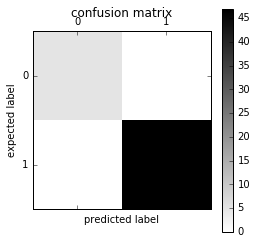

[[ 5  0]
 [ 0 47]]
Standard errors:  [ 190.13011487    2.25369482]
Wald statistics:  [ 0.34180646  0.34167084]
p_val coef 0.558866367029
p_val intercep 0.558788350754
22.1956927985
0.00323222208176
t = -0.584526164865
p_val: 0.558866367029
CI:
-5.73458542727 3.09989825197
===== new fold
Coef: -1.54143034738  intercept: 130.065265901
1.0


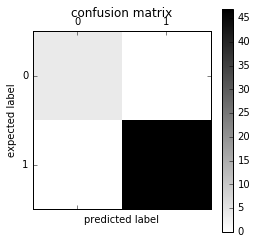

[[ 4  0]
 [ 0 47]]
Standard errors:  [ 215.9362813     2.55916313]
Wald statistics:  [ 0.36280347  0.36278713]
p_val coef 0.546962395651
p_val intercep 0.546953368437
32.2826322969
0.00141958588442
t = -0.602318128845
p_val: 0.546962395651
CI:
-6.55739008059 3.47452938583
===== new fold
Coef: -1.16440817397  intercept: 98.2570252278
1.0


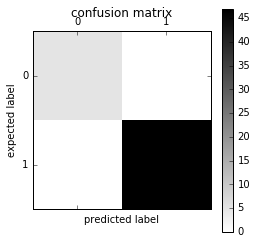

[[ 5  0]
 [ 0 47]]
Standard errors:  [ 162.33982463    1.92483528]
Wald statistics:  [ 0.36633387  0.36595135]
p_val coef 0.545219443766
p_val intercep 0.545009434531
13.5755308658
0.00717548216337
t = -0.604939127618
p_val: 0.545219443766
CI:
-4.93708531912 2.60826897119
===== new fold
Coef: -1.28555717604  intercept: 108.47643107
1.0


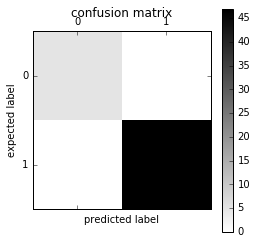

[[ 5  0]
 [ 0 47]]
Standard errors:  [ 185.07541642    2.19387314]
Wald statistics:  [ 0.34353683  0.34336796]
p_val coef 0.557891590628
p_val intercep 0.557794775423
20.3775574597
0.00375169131697
t = -0.58597607805
p_val: 0.557891590628
CI:
-5.58554852282 3.01443417074
===== new fold
Coef: -1.19930386282  intercept: 101.194705635
1.0


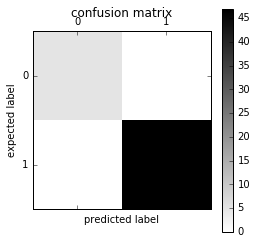

[[ 5  0]
 [ 0 47]]
Standard errors:  [ 196.86794033    2.33327381]
Wald statistics:  [ 0.26421994  0.2641965 ]
p_val coef 0.607251653342
p_val intercep 0.607235710207
29.1925284036
0.00311190398718
t = -0.514000482478
p_val: 0.607251653342
CI:
-5.77252052559 3.37391279994


In [56]:


predict_model_scikit(X,y)

-0.959472701748 80.9786926055
             precision    recall  f1-score   support

     female       1.00      1.00      1.00         5
    neutral       1.00      1.00      1.00        52

avg / total       1.00      1.00      1.00        57

1.0


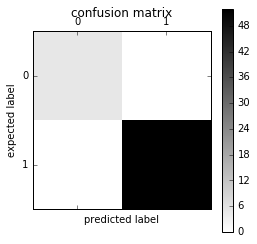

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          1       1.00      1.00      1.00        52

avg / total       1.00      1.00      1.00        57

[[ 5  0]
 [ 0 52]]


In [47]:

X_train=X[:,:]
Y_train=y[:,:]
model = LogisticRegression(C=1e5)
model = model.fit(X_train,Y_train.ravel())
print model.coef_[0][0],model.intercept_[0]
y_true=Y_train
y_pred=model.predict(X_train)


target_names = ['female',  'neutral']
print(classification_report(y_true, y_pred, target_names=target_names))
print r2_score(y_true, y_pred)

plt.matshow(confusion_matrix(y_true, y_pred), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

print classification_report(y_true, y_pred)
print confusion_matrix(y_true, y_pred)   

    

In [48]:
# Calculate matrix of predicted class probabilities. 
predProbs = np.matrix(model.predict_proba(X_train))
# Design matrix -- add column of 1's at the beginning of your X_train matrix
X_design = np.concatenate((np.ones( X_train.shape[0]).reshape(X_train.shape[0], 1),
                X_train[:,0].reshape(X_train.shape[0], 1)),axis=1)
# Initiate matrix of 0's, fill diagonal with each predicted observation's variance
V = np.matrix(np.zeros(shape = (X_design.shape[0], X_design.shape[0])))
#np.fill_diagonal(V, np.multiply(predProbs[:,0], predProbs[:,1]).A1)
np.fill_diagonal(V, np.multiply(predProbs[:,0], predProbs[:,1]).A1)
# Covariance matrix
covLogit = np.linalg.inv(X_design.T * V * X_design)
#print "Covariance matrix: ", covLogit
# Standard errors
sdd=np.sqrt(np.diag(covLogit))
print "Standard errors: ", sdd
# Wald statistic (coefficient / s.e.) ^ 2
logitParams = np.insert(model.coef_[0], 0, model.intercept_[0])
print "Wald statistics: ", ((logitParams / sdd) ** 2)
#print "Wald statistics intercept: ", ((logitParams_intercept / sdd** 2)[0]
wald_score=((logitParams / sdd) ** 2 )
#wald_score_intercept=((logitParams_intercept / np.sqrt(np.diag(covLogit))) ** 2)[0]
print "p_val coef",chisqprob(wald_score[1],1)
print "p_val intercep",chisqprob(wald_score[0],1)
#print "p_val intercept",chisqprob(wald_score_intercept,1)

# upper CI for beta
print np.exp(model.coef_[0][0]+1.96*sdd[1])
# lower CI for beta
print np.exp(model.coef_[0][0]-1.96*sdd[1])
#print np.exp(mlogit_res_.params[0])
# critical value of the t-statistic





i=0
# the estimated coefficient, and its variance
beta = model.coef_[0][0]
se = sdd[1]
t = beta / se
print 't =', t

print "p_val:",2* (1 - scipy.stats.norm.cdf(abs(t)))
print "CI:"
# the confidence interval
print beta - 1.96 * se, beta + 1.96 * se

Standard errors:  [ 115.74201129    1.3736283 ]
Wald statistics:  [ 0.48950764  0.48789547]
p_val coef 0.484867591976
p_val intercep 0.484147018578
5.6566891689
0.0259447974766
t = -0.698495146701
p_val: 0.484867591976
CI:
-3.65178417207 1.73283876857
